# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputDataFile = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

# citipy usage
Looking up for city names with geo-coordinates has always been a big problem when it comes to dealing with social data.
We have only this many cities in the world, why isn't there any data set that provides the geo coordinates for all the

available cities, and we can use certain data structure/algorithm like kdtree to look up the nearest city given a set of geo coordinates?

Luckily, both Maxmind(www.maxmind.com/en/free-world-cities-database) and GeoNames(download.geonames.org/export/dump) provide comprehensive data sets like this.

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# make up the dynamic url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
queryUrl = f"{url}appid={api_key}&units={units}&q="
print(queryUrl)
# set up lists to hold reponse info
cityName = []
countryName = []
latitude = []
longitude = []
maxTemp = []
humidity = []
cloudiness = []
date = []
windSpeed = []

http://api.openweathermap.org/data/2.5/weather?appid=f16687ffd6cc384e02b2b3834a3a3fd9&units=imperial&q=


In [4]:
# counter for the call
cnt = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#now loop through the city list built earlier
for city in cities:
    
    # error handling to skip the error/not found cities
    try:
        #print(f"{queryUrl}{city}")
        # limit calls to 500 cities as required
        if (cnt > 500):
            break
        response = requests.get(f"{queryUrl}{city}").json()
        cityName.append(response["name"])
        countryName.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        windSpeed.append(response["wind"]["speed"])
        
        print(f"Processing data for {cnt} ~ {city}")
        cnt += 1
        
        # wait for a second to avoid blocking the calls
        time.sleep(1.00)
        
    except:
        print(f"{city} not found, skipping to next city!")
        
    continue


Beginning Data Retrieval
-------------------------------
Processing data for 1 ~ quatre cocos
Processing data for 2 ~ provideniya
Processing data for 3 ~ pemberton
Processing data for 4 ~ ushuaia
turtkul not found, skipping to next city!
Processing data for 5 ~ cape town
Processing data for 6 ~ nizhniy ingash
Processing data for 7 ~ chokurdakh
Processing data for 8 ~ mar del plata
Processing data for 9 ~ hobart
barentsburg not found, skipping to next city!
Processing data for 10 ~ saint-philippe
Processing data for 11 ~ jamestown
Processing data for 12 ~ mataura
Processing data for 13 ~ cap malheureux
taolanaro not found, skipping to next city!
Processing data for 14 ~ nanortalik
Processing data for 15 ~ fortuna
Processing data for 16 ~ bosaso
Processing data for 17 ~ oda
Processing data for 18 ~ zharkent
Processing data for 19 ~ arcachon
Processing data for 20 ~ hermanus
Processing data for 21 ~ busselton
Processing data for 22 ~ gravdal
Processing data for 23 ~ nivala
Processing data

Processing data for 205 ~ nome
Processing data for 206 ~ plettenberg bay
Processing data for 207 ~ codrington
Processing data for 208 ~ grand gaube
Processing data for 209 ~ gat
Processing data for 210 ~ mahebourg
Processing data for 211 ~ adrar
Processing data for 212 ~ tutoia
Processing data for 213 ~ barrow
Processing data for 214 ~ ostrovnoy
Processing data for 215 ~ touros
Processing data for 216 ~ vila velha
Processing data for 217 ~ salalah
Processing data for 218 ~ sioux lookout
Processing data for 219 ~ agirish
Processing data for 220 ~ northam
Processing data for 221 ~ georgetown
Processing data for 222 ~ nakhon phanom
Processing data for 223 ~ riyadh
Processing data for 224 ~ acapulco
Processing data for 225 ~ besikduzu
Processing data for 226 ~ vokhtoga
asau not found, skipping to next city!
Processing data for 227 ~ sola
Processing data for 228 ~ umm kaddadah
ruatoria not found, skipping to next city!
Processing data for 229 ~ amahai
Processing data for 230 ~ lublin
Proces

makung not found, skipping to next city!
Processing data for 411 ~ los rastrojos
Processing data for 412 ~ kirakira
Processing data for 413 ~ rudsar
Processing data for 414 ~ dhanaula
Processing data for 415 ~ nouadhibou
Processing data for 416 ~ strezhevoy
Processing data for 417 ~ trairi
Processing data for 418 ~ narsaq
Processing data for 419 ~ yangjiang
Processing data for 420 ~ waipawa
Processing data for 421 ~ pedernales
Processing data for 422 ~ coihaique
Processing data for 423 ~ puerto triunfo
Processing data for 424 ~ saint-pierre
Processing data for 425 ~ mazamitla
Processing data for 426 ~ praia da vitoria
lar gerd not found, skipping to next city!
Processing data for 427 ~ red bluff
Processing data for 428 ~ kilindoni
Processing data for 429 ~ nhulunbuy
Processing data for 430 ~ machachi
Processing data for 431 ~ ous
Processing data for 432 ~ teya
Processing data for 433 ~ alofi
rungata not found, skipping to next city!
Processing data for 434 ~ pitimbu
Processing data for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create DataFrame
weather = {
    "City": cityName,
    "Cloudiness":cloudiness, 
    "Country":countryName,
    "Date":date, 
    "Humidity": humidity,
    "Latitude":latitude, 
    "Longitude":longitude, 
    "Max Temp": maxTemp,
    "Wind Speed":windSpeed
}

weatherData = pd.DataFrame(weather)
weatherData.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Latitude      500
Longitude     500
Max Temp      500
Wind Speed    500
dtype: int64

In [6]:
# save the output in csv
weatherData.to_csv(outputDataFile)
weatherData.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Quatre Cocos,40,MU,1569806766,88,-20.21,57.76,69.80,3.36
1,Provideniya,0,RU,1569806767,81,64.42,-173.23,46.40,4.47
2,Pemberton,78,AU,1569806769,95,-34.44,116.03,62.01,1.99
3,Ushuaia,75,AR,1569806672,97,-54.81,-68.31,32.00,12.75
4,Cape Town,20,ZA,1569806668,87,-33.93,18.42,59.00,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

* Using Scatter plot from matplotlib
https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

In [7]:
# set scatter marker size and color sequesce
area = (30 * np.random.rand(len(weatherData)))**2
colors = np.random.rand(len(weatherData))

#### Latitude vs. Temperature Plot

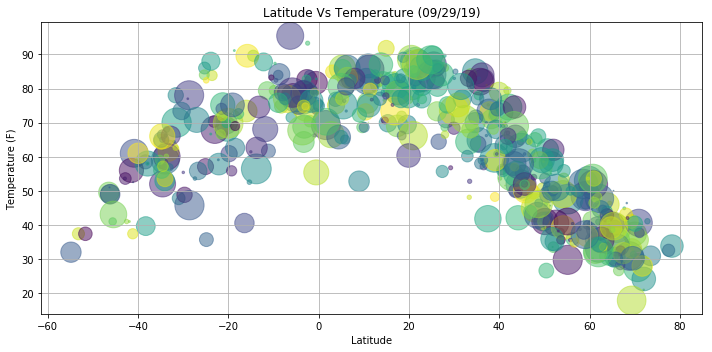

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(weatherData["Latitude"], weatherData["Max Temp"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Temperature ({time.strftime('%x')})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# saving the plot
plt.tight_layout()
plt.savefig("Output/LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

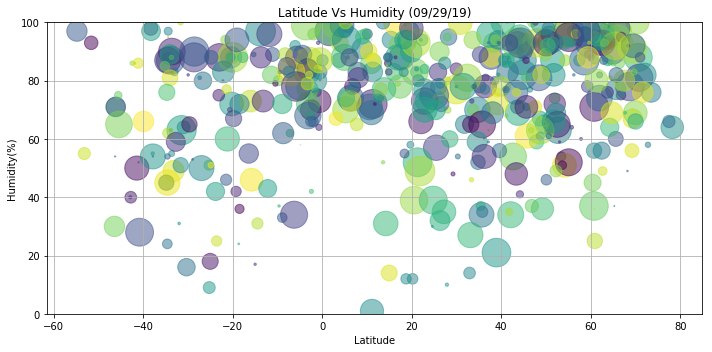

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(weatherData["Latitude"], weatherData["Humidity"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Humidity ({time.strftime('%x')})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.grid(True)

# saving the plot
plt.tight_layout()
plt.savefig("Output/LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

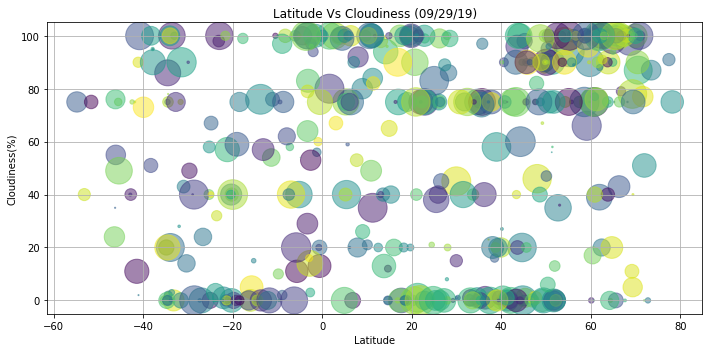

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(weatherData["Latitude"], weatherData["Cloudiness"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Cloudiness ({time.strftime('%x')})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# saving the plot
plt.tight_layout()
plt.savefig("Output/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

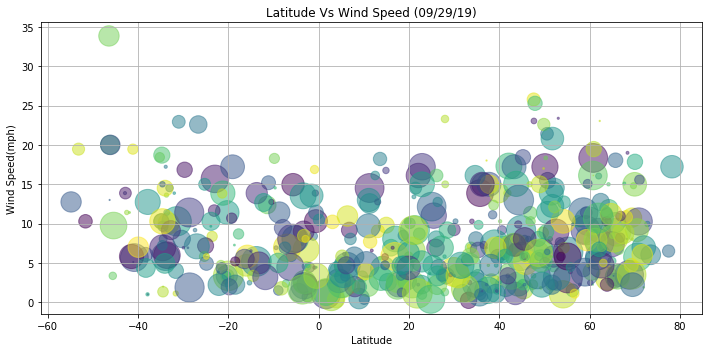

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(weatherData["Latitude"], weatherData["Wind Speed"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Wind Speed ({time.strftime('%x')})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# saving the plot
plt.tight_layout()
plt.savefig("Output/LatVsWindSpeed.png")
plt.show()